In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

In [22]:
#%matplotlib notebook
%matplotlib inline

In [16]:
filename = 'files/dados_start.csv'
#data = pd.read_csv(filename, encoding='ISO-8859–1')
data = pd.read_csv(filename, sep=';')


In [21]:
#X exp. values
disp = data['Displ(um)'].values
#Y exp. values
force = data['Force(mN)'].values


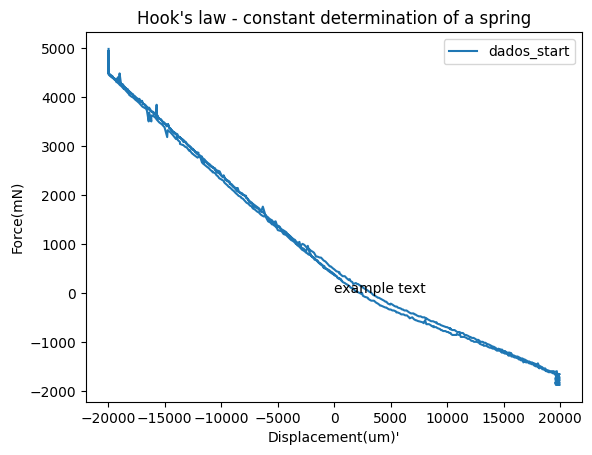

In [23]:
plt.figure()
plt.plot(disp, force, label='dados_start')
#plt.plot(x, y2, '.', label='$\sin^{2}$')
#plt.plot(x, y3, linewidth=3)
#plt.annotate('example text', xy=(0.5, -0.75))
plt.xlabel("Displacement(um)")
plt.ylabel("Force(mN)")
plt.title("Hook's law - constant determination of a spring")
plt.legend()
plt.show()

In [33]:
# Fit Function
# https://stackoverflow.com/questions/29382903/how-to-apply-piecewise-linear-fit-in-python
def f(dsp, m1, b1, m2, b2):
    xcross = (m1 - m2) /(b2 - b1)
    if (dsp < xcross):
        fit_Force = m1 * dsp + b1
    else:
        fit_Force = m2 * dsp + b2
    return fit_Force

In [34]:
popt, pcov = curve_fit(f, disp, force)
perr = np.sqrt(np.diag(pcov))
fitted_force = f(disp, *popt)
rmse = np.sqrt(
    np.sum((force - fitted_force) ** 2) )

/var/folders/_s/mxw27vg12vz508qhprf8szyr0000gn/T/ipykernel_18296/118816975.py:3: RuntimeWarning: invalid value encountered in scalar divide
  xcross = (m1 - m2) /(b2 - b1)


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [30]:
popt

array([-1.61040465e-01,  9.62597483e+02])

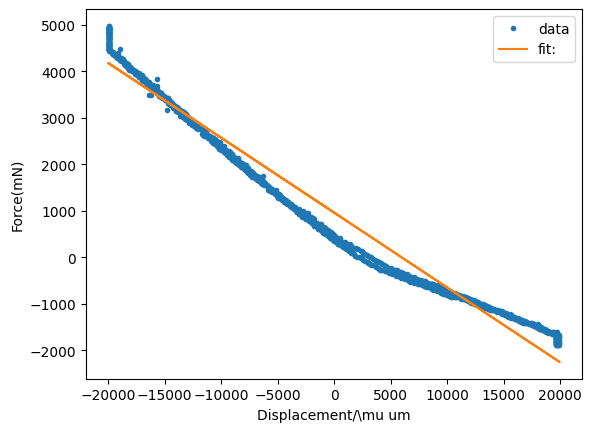

In [31]:
# Plot chosen data and fit results
pnames = ['Isat', 'Vf', 'Te']
punits = ['mA', 'V', 'eV']
fig2, ax2 = plt.subplots(1)
ax2.plot(disp, force, '.', label='data')
ax2.plot(disp, fitted_force, 
    label='fit:')
ax2.legend()
ax2.set_xlabel('Displacement/\mu um')
ax2.set_ylabel('Force(mN)')
plt.show(block=True)